In [179]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# import lazypredict

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

import statsmodels.tsa.stattools as st
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [180]:
df_ger = pd.read_csv('Data/Senegal.csv',  index_col='Year')
df_ger # the one with categorical variable for Germany

,Country,ISO 3166-1 alpha-3,Total,Coal,Oil,Gas
Year,,,,,,
1980,Senegal,SEN,3.336441,0.000000,3.154704,0.000000
1981,Senegal,SEN,3.279857,0.000000,3.107072,0.000000
1982,Senegal,SEN,3.036573,0.000000,2.872576,0.000000
1983,Senegal,SEN,2.611411,0.000000,2.432896,0.000000
1984,Senegal,SEN,3.284168,0.000000,3.114400,0.000000
1985,Senegal,SEN,2.650504,0.000000,2.473200,0.000000
1986,Senegal,SEN,2.636446,0.000000,2.480280,0.000000
1987,Senegal,SEN,2.424574,0.000000,2.264352,0.000000
1988,Senegal,SEN,2.710809,0.000000,2.531824,0.014656


In [181]:
# Drop the categorial variables
df= df_ger.select_dtypes(include=['float64'])
df

,Total,Coal,Oil,Gas
Year,,,,
1980,3.336441,0.000000,3.154704,0.000000
1981,3.279857,0.000000,3.107072,0.000000
1982,3.036573,0.000000,2.872576,0.000000
1983,2.611411,0.000000,2.432896,0.000000
1984,3.284168,0.000000,3.114400,0.000000
1985,2.650504,0.000000,2.473200,0.000000
1986,2.636446,0.000000,2.480280,0.000000
1987,2.424574,0.000000,2.264352,0.000000
1988,2.710809,0.000000,2.531824,0.014656


In [182]:
#  plot to see total emission versus year for 'Germany'
fig_ger = px.line(df, x=df.index, y="Total")
fig_ger.update_xaxes(rangeslider_visible=True)
fig_ger.show()

Visualize the time series

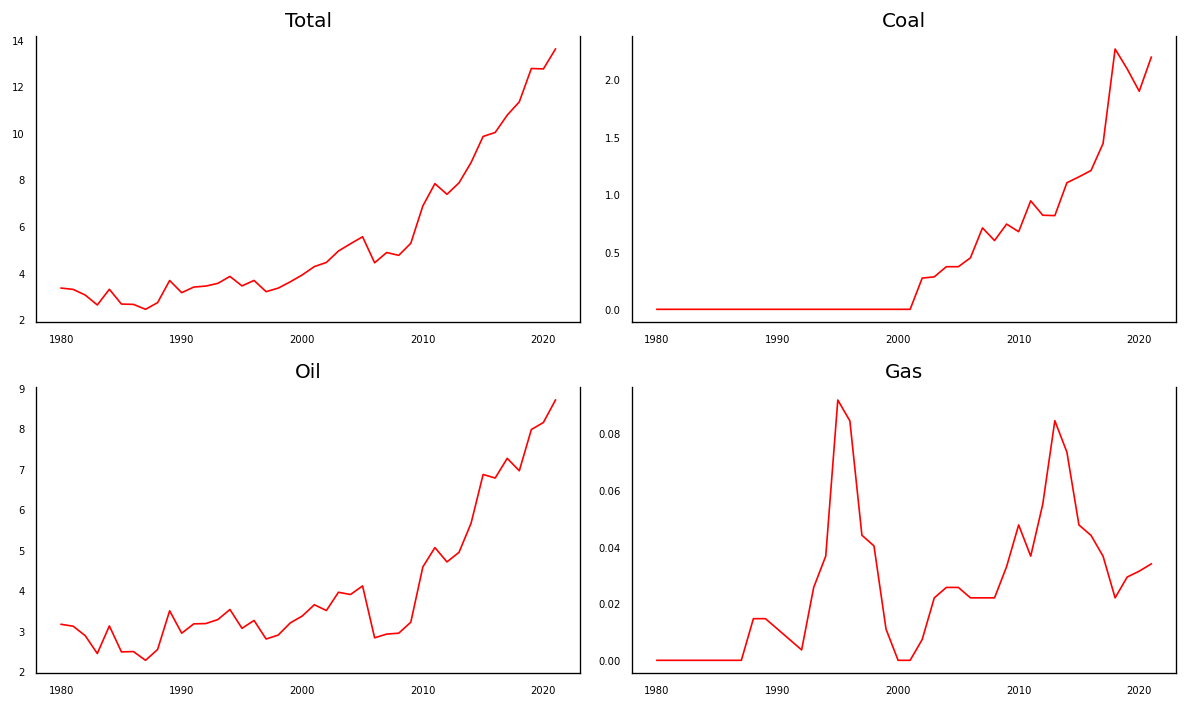

In [183]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

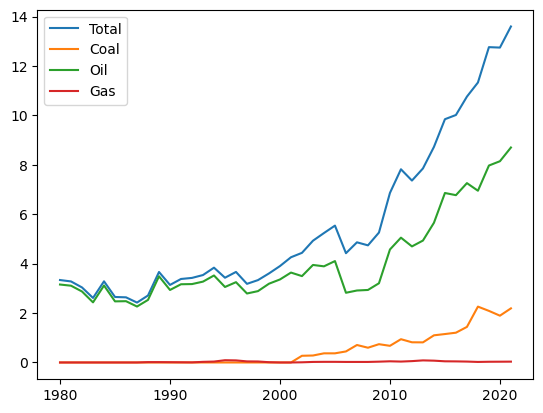

In [184]:
plt.figure()

x = df.index
y1 = df['Total']
y2 = df['Coal']
y3 = df['Oil']
y4 = df['Gas']






plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)




plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

Grainger's Causality Test

In [185]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)   

,Total_x,Coal_x,Oil_x,Gas_x
Total_y,1.0,0.0000,0.0,0.0001
Coal_y,0.0,1.0000,0.0,0.0000
Oil_y,0.0,0.0000,1.0,0.0000
Gas_y,0.0,0.0484,0.0,1.0000


 Cointegration Test

In [186]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Total  ::  91.15     > 40.1749   =>   True
Coal   ::  25.54     > 24.2761   =>   True
Oil    ::  9.26      > 12.3212   =>   False
Gas    ::  0.0       > 4.1296    =>   False


Split the Series into Training and Testing Data

In [187]:
nobs = 5
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  
print(df_test.shape) 

(37, 4)
(5, 4)


Check for Stationarity and Make the Time Series Stationary

In [188]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [189]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = 1.5565
 No. Lags Chosen       = 0
 Critical value 1%     = -3.627
 Critical value 5%     = -2.946
 Critical value 10%    = -2.612
 => P-Value = 0.9977. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1048
 No. Lags Chosen       = 7
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.949. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root

In [190]:
# The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.
# 1st difference
df_differenced = df_train.diff().dropna()

In [191]:
# Re-run ADF test on each differenced series.
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    ### result: all the time series became stationary ###

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5512
 No. Lags Chosen       = 0
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9202
 No. Lags Chosen       = 6
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.7812. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

In [192]:
# Second Differencing
df_differenced = df_differenced.diff().dropna()

In [193]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Total" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5044
 No. Lags Chosen       = 2
 Critical value 1%     = -3.654
 Critical value 5%     = -2.957
 Critical value 10%    = -2.618
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Coal" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.4667
 No. Lags Chosen       = 5
 Critical value 1%     = -3.679
 Critical value 5%     = -2.968
 Critical value 10%    = -2.623
 => P-Value = 0.0089. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Oil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.

How to Select the Order (P) of VAR model

In [194]:
# To select the right order of the VAR model, we iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.
# Though the usual practice is to look at the AIC, you can also check other best fit comparison estimates of BIC, FPE and HQIC.

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -17.39170481423767
BIC :  -16.493845682110514
FPE :  2.8223464291598957e-08
HQIC:  -17.08550913632092 

Lag Order = 2
AIC :  -16.97267676184734
BIC :  -15.34012305842936
FPE :  4.5025727337949044e-08
HQIC:  -16.423372112957836 

Lag Order = 3
AIC :  -17.409072549029226
BIC :  -15.02725170697967
FPE :  3.355169320772376e-08
HQIC:  -16.619566325508806 

Lag Order = 4
AIC :  -17.615046327713536
BIC :  -14.46952600819773
FPE :  3.846302769226158e-08
HQIC:  -16.589685136015763 

Lag Order = 5
AIC :  -20.335956190367483
BIC :  -16.41260352171345
FPE :  5.616529060025152e-09
HQIC:  -19.08084196243885 

Lag Order = 6
AIC :  -26.13703853909788
BIC :  -21.42222533224797
FPE :  1.4963359329910533e-10
HQIC:  -24.66041786383458 

Lag Order = 7
AIC :  -260.189176866773
BIC :  -254.67004389604713
FPE :  2.668920672556582e-110
HQIC:  -258.50192289514 

Lag Order = 8
AIC :  -266.47867930288567
BIC :  -260.1434768468645
FPE :  1.0552250678411331e-116
HQIC:  -264.594891499212 

Lag O

In [195]:
# An alternate method to choose the order(p) of the VAR models is to use the model.select_order(maxlags) method.
#x = model.select_order(maxlags=6)
#x.summary()

We choose p = 2 as the number of lags (AIC is locally minimum at p=2)

Train the VAR Model of Selected Order(p)

In [196]:
p=2
model_fitted = model.fit(p)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     12:16:46
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -15.3401
Nobs:                     33.0000    HQIC:                  -16.4234
Log likelihood:           128.749    FPE:                4.50257e-08
AIC:                     -16.9727    Det(Omega_mle):     1.71601e-08
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.049576         0.117081            0.423           0.672
L1.Total        -1.042818         1.464809           -0.712           0.477
L1.Coal          0.991504         1.590915            0.623           0.533
L1.O

Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. Results close to 2 is alright.

In [197]:
from statsmodels.stats.stattools import durbin_watson

def adjust(val, length= 6): return str(val).ljust(length)
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(adjust(col), ':', round(val, 2))

Total  : 2.15
Coal   : 2.18
Oil    : 2.08
Gas    : 1.99


How to Forecast VAR model using statsmodels

In [198]:
df_differenced

,Total,Coal,Oil,Gas
Year,,,,
1982,-0.186700,0.000000,-0.186864,0.000000e+00
1983,-0.181878,0.000000,-0.205184,0.000000e+00
1984,1.097919,0.000000,1.121184,0.000000e+00
1985,-1.306421,0.000000,-1.322704,0.000000e+00
1986,0.619606,0.000000,0.648280,0.000000e+00
1987,-0.197814,0.000000,-0.223008,0.000000e+00
1988,0.498107,0.000000,0.483400,1.465600e-02
1989,0.664833,0.000000,0.688832,-1.465600e-02
1990,-1.474141,0.000000,-1.509568,-3.664000e-03


In [199]:
# In order to forecast, the VAR model expects up to the lag order number of observations from the past data.
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

2


array([[ 0.249365, -0.23412 ,  0.485925, -0.014617],
       [-0.950774,  0.003664, -1.293392,  0.021984]])

In [200]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs) # nobs is from test train split ratio
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Total_2d,Coal_2d,Oil_2d,Gas_2d
Year,,,,
2017,0.708506,0.143239,0.802912,-0.006966
2018,-0.652524,-0.101712,-0.457660,-0.016231
2019,0.485326,-0.002177,0.263531,0.020127
2020,0.102244,0.051573,0.144098,-0.009476
2021,-0.410781,-0.001158,-0.342687,-0.004453


Invert the transformation to get the real forecast

In [201]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [202]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
Year,,,,
2017,10.894486,1.403655,7.486048,0.033338
2018,11.120750,1.500141,7.743363,0.006478
2019,11.832340,1.594451,8.264209,-0.000256
2020,12.646174,1.740333,8.929152,-0.016465
2021,13.049227,1.885057,9.251408,-0.037127


In [203]:
df_test

,Total,Coal,Oil,Gas
Year,,,,
2017,10.760132,1.439952,7.258384,0.036640
2018,11.330392,2.260688,6.950608,0.021984
2019,12.761457,2.087880,7.970572,0.029304
2020,12.743876,1.894052,8.144750,0.031372
2021,13.597910,2.190262,8.700009,0.033937


Plot of Forecast vs Actuals

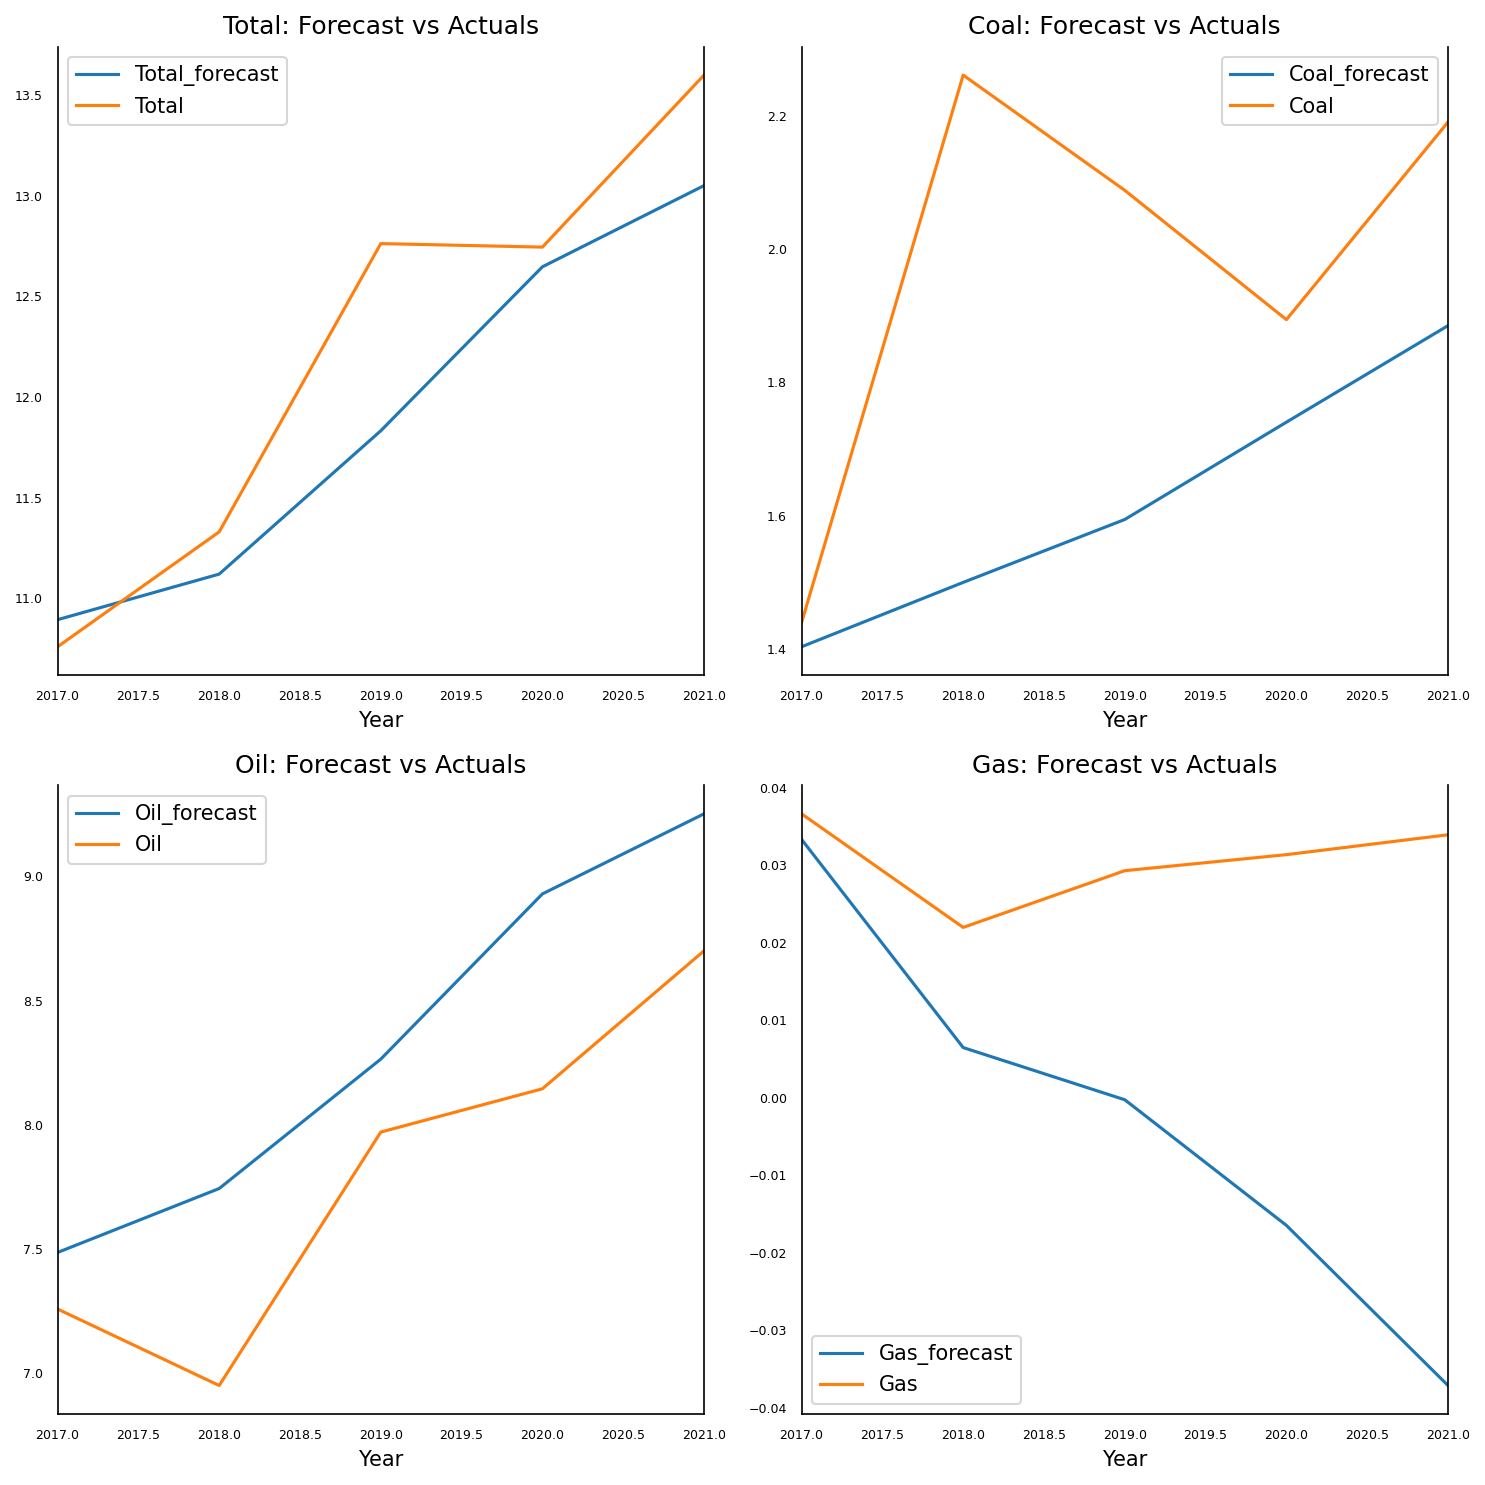

In [204]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

Evaluate the Forecasts

In [205]:
# To evaluate the forecasts, let’s compute a comprehensive set of metrics, namely, the MAPE, ME, MAE, MPE, RMSE, corr and minmax.
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: Total')
accuracy_prod = forecast_accuracy(df_results['Total_forecast'].values, df_test['Total'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Coal')
accuracy_prod = forecast_accuracy(df_results['Coal_forecast'].values, df_test['Coal'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Oil')
accuracy_prod = forecast_accuracy(df_results['Oil_forecast'].values, df_test['Oil'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: Gas')
accuracy_prod = forecast_accuracy(df_results['Gas_forecast'].values, df_test['Gas'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))


Forecast Accuracy of: Total
mape   :  0.0304
me     :  -0.3302
mae    :  0.3839
mpe    :  -0.0254
rmse   :  0.4972
corr   :  0.9438
minmax :  0.0303

Forecast Accuracy of: Coal
mape   :  0.1637
me     :  -0.3498
mae    :  0.3498
mpe    :  -0.1637
rmse   :  0.4336
corr   :  0.4999
minmax :  0.1637

Forecast Accuracy of: Oil
mape   :  0.0684
me     :  0.53
mae    :  0.53
mpe    :  0.0684
rmse   :  0.5807
corr   :  0.9359
minmax :  0.0632

Forecast Accuracy of: Gas
mape   :  1.0846
me     :  -0.0335
mae    :  0.0335
mpe    :  -1.0846
rmse   :  0.0411
corr   :  0.017
minmax :  1.0846


Forecasting the future: for 2 years (since p=2)

In [206]:
df_differenced_all = df.diff().dropna()

In [207]:
df_differenced_all

,Total,Coal,Oil,Gas
Year,,,,
1981,-0.056584,0.000000,-0.047632,0.000000
1982,-0.243284,0.000000,-0.234496,0.000000
1983,-0.425162,0.000000,-0.439680,0.000000
1984,0.672757,0.000000,0.681504,0.000000
1985,-0.633664,0.000000,-0.641200,0.000000
1986,-0.014058,0.000000,0.007080,0.000000
1987,-0.211872,0.000000,-0.215928,0.000000
1988,0.286235,0.000000,0.267472,0.014656
1989,0.951068,0.000000,0.956304,0.000000


In [208]:
forecast_input_all = df_differenced_all.values[-lag_order:]
forecast_input_all # the output is the values of total, coal, oil and gas for 2015 and 2016 (this depends on the train test split and lag_order)

array([[-0.017581, -0.193828,  0.174178,  0.002068],
       [ 0.854034,  0.29621 ,  0.555259,  0.002565]])

In [209]:
model_all = VAR(df_differenced_all)
model_fitted_all = model_all.fit(p)
model_fitted_all.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 02, Mar, 2023
Time:                     12:16:47
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -15.1779
Nobs:                     39.0000    HQIC:                  -16.1625
Log likelihood:           140.558    FPE:                5.70353e-08
AIC:                     -16.7135    Det(Omega_mle):     2.48563e-08
--------------------------------------------------------------------
Results for equation Total
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.188208         0.119714            1.572           0.116
L1.Total        -0.034415         0.858329           -0.040           0.968
L1.Coal          1.260333         1.033218            1.220           0.223
L1.O

In [210]:
# Forecast

l = df_differenced_all.last_valid_index() # gives the index of the last row in df_differenced_all
s = 10 # steps to future
fc_all = model_fitted_all.forecast(y=forecast_input_all, steps=s) 
df_forecast_all = pd.DataFrame(fc_all, index=list(range(l+1,l+s+1)), columns=df.columns + '_2d')
df_forecast_all

,Total_2d,Coal_2d,Oil_2d,Gas_2d
2022,0.669507,0.094966,0.483192,-0.002580
2023,0.326699,-0.018409,0.164582,0.005091
2024,0.324325,0.072410,0.191148,0.004105
2025,0.330904,0.114612,0.168506,0.000768
2026,0.335035,0.040984,0.194983,0.001566
2027,0.265461,0.037804,0.147282,0.001621
2028,0.278939,0.073788,0.148014,0.001171
2029,0.308697,0.063934,0.173961,0.000967
2030,0.289827,0.048272,0.163706,0.001152
2031,0.281877,0.057523,0.155350,0.001215


In [211]:
# Tranforming the future forecast back
df_results_all = invert_transformation(df, df_forecast_all, second_diff=True) 
df_results_all = df_results_all.loc[:, ['Total_forecast', 'Coal_forecast', 'Oil_forecast','Gas_forecast']]

In [212]:
df_results_all

,Total_forecast,Coal_forecast,Oil_forecast,Gas_forecast
2022,15.121451,2.581438,9.738460,0.033922
2023,16.971691,2.954205,10.941494,0.038999
2024,19.146256,3.399381,12.335676,0.048181
2025,21.651724,3.959170,13.898363,0.058131
2026,24.492228,4.559942,15.656033,0.069647
2027,27.598193,5.198519,17.560985,0.082784
2028,30.983097,5.910884,19.613951,0.097092
2029,34.676698,6.687183,21.840878,0.112367
2030,38.660125,7.511754,24.231511,0.128794
2031,42.925429,8.393848,26.777494,0.146435


In [213]:
# Concate the actual df with the forecasted df till 2031 (df_results_all)

df_results_all = df_results_all.rename(columns={"Total_forecast": "Total", "Coal_forecast": "Coal", "Oil_forecast": "Oil", "Gas_forecast": "Gas"})
# renaming the df_results_all columns to that of df

df_results_all

,Total,Coal,Oil,Gas
2022,15.121451,2.581438,9.738460,0.033922
2023,16.971691,2.954205,10.941494,0.038999
2024,19.146256,3.399381,12.335676,0.048181
2025,21.651724,3.959170,13.898363,0.058131
2026,24.492228,4.559942,15.656033,0.069647
2027,27.598193,5.198519,17.560985,0.082784
2028,30.983097,5.910884,19.613951,0.097092
2029,34.676698,6.687183,21.840878,0.112367
2030,38.660125,7.511754,24.231511,0.128794
2031,42.925429,8.393848,26.777494,0.146435


In [214]:
# Concat syntax
df_future  = pd.concat([df, df_results_all], axis=0)
df_future

,Total,Coal,Oil,Gas
1980,3.336441,0.000000,3.154704,0.000000
1981,3.279857,0.000000,3.107072,0.000000
1982,3.036573,0.000000,2.872576,0.000000
1983,2.611411,0.000000,2.432896,0.000000
1984,3.284168,0.000000,3.114400,0.000000
1985,2.650504,0.000000,2.473200,0.000000
1986,2.636446,0.000000,2.480280,0.000000
1987,2.424574,0.000000,2.264352,0.000000
1988,2.710809,0.000000,2.531824,0.014656
1989,3.661877,0.000000,3.488128,0.014656


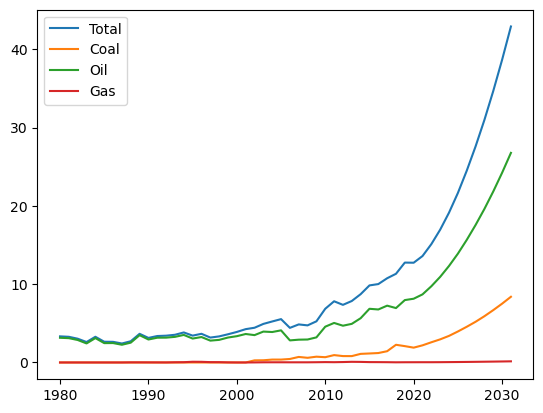

In [215]:
# Plot
plt.figure()

x = df_future.index
y1 = df_future['Total']
y2 = df_future['Coal']
y3 = df_future['Oil']
y4 = df_future['Gas']

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(['Total', 'Coal', 'Oil', 'Gas'])

In [216]:
# save to csv
df_future.to_csv('Data/Senegal_future.csv', index=False)